In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [317]:
#从csv中读取文件
tmp = np.loadtxt(open("/Users/AllenLI/Codes/sklearn/winequality-red.csv"), dtype=np.str, delimiter=";")

Y = tmp[1:,-1].astype(np.float)  #读取标签
X = tmp[1:,:-1].astype(np.float)  #读取特征

for i in range(len(Y)):  #二值化标签
    if 0<Y[i]<6:
        Y[i] = 0
    else:
        Y[i] = 1
            
#划分训练集和测试集
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=32, stratify=Y)

In [318]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
    
#数据归一化
minVals = X.min(0)
maxVals = X.max(0)
X = (X-minVals)/(maxVals-minVals)

neighbors = np.arange(1,18)  #选取K值为1到18
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)

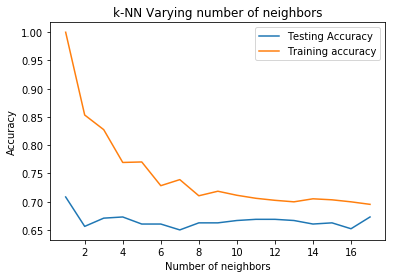

In [319]:
#根据不同k值的选取绘制图表
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [313]:
from sklearn import tree
treeclf = tree.DecisionTreeClassifier(criterion='gini')
treeclf.fit(X_train,Y_train)
test_accuracy = treeclf.score(X_test,Y_test)
print(test_accuracy)

0.75


In [314]:
from sklearn.externals.six import StringIO
import pydotplus

# 画图，保存到pdf文件
# 设置图像参数
dot_data = tree.export_graphviz(treeclf, out_file=None,
                         filled=True, rounded=True,
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
# 保存图像到pdf文件
graph.write_pdf("tree.pdf")

True

In [300]:
from sklearn.naive_bayes import GaussianNB

bayesclf = GaussianNB().fit(X_train, Y_train)
test_accuracy = bayesclf.score(X_test, Y_test)

In [301]:
test_accuracy

0.7234375

In [206]:
print(bayesclf.predict([X_test[32]]))

[0.]


In [295]:
#混淆函数
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
Y_pred = knn.predict(X_test)
#print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

             precision    recall  f1-score   support

        0.0       0.63      0.62      0.63       298
        1.0       0.67      0.68      0.68       342

avg / total       0.65      0.65      0.65       640



In [260]:
#特征选择 树形选择法
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf = clf.fit(X_train, Y_train)
clf.feature_importances_

array([0.06493354, 0.09689237, 0.06938514, 0.07137427, 0.06919244,
       0.06453383, 0.09306585, 0.07423613, 0.07125195, 0.09700279,
       0.22813169])

In [326]:
#方差选择法
from sklearn.feature_selection import VarianceThreshold
VarianceThreshold(threshold=3).fit_transform(X_train)

array([[ 8.8, 19. , 72. ],
       [ 7.6, 10. , 88. ],
       [ 9.9,  6. , 33. ],
       ...,
       [ 8.3,  6. , 12. ],
       [ 6.7, 15. , 36. ],
       [ 7.9, 23. , 49. ]])

In [328]:
#卡方检验
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
SelectKBest(chi2, k=5).fit_transform(X, Y)

array([[0.39726027, 0.        , 0.09893993, 0.13772455, 0.15384615],
       [0.52054795, 0.        , 0.2155477 , 0.20958084, 0.21538462],
       [0.43835616, 0.04      , 0.16961131, 0.19161677, 0.21538462],
       ...,
       [0.26712329, 0.13      , 0.12014134, 0.25149701, 0.4       ],
       [0.35958904, 0.12      , 0.13427562, 0.22754491, 0.27692308],
       [0.13013699, 0.47      , 0.12720848, 0.19760479, 0.4       ]])